In [1]:
import json
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe
import sys
from pingouin import mwu
import random
import pylab

In [8]:
# EXPERIMENT 1 (SINGLE PP)
cond_1_BC_struct = np.array(np.loadtxt('processed_data_and_figures/exp_1_one_player_known_structure/main/cond_1_BC_full.txt').reshape(48,3,10))
cond_2_no_struct = np.array(np.loadtxt('processed_data_and_figures/exp_1_one_player_known_structure/main/cond_2_no_struct_full.txt').reshape(51,3,10))
cond_3_CB_struct = np.array(np.loadtxt('processed_data_and_figures/exp_1_one_player_known_structure/main/cond_3_CB_full.txt').reshape(50,3,10))

# computing mean mean judg within pp including all judg affected by manipulation (from 4 onwards)
cond_1_mean = []
cond_2_mean = []
cond_3_mean = []
for i in range(len(cond_1_BC_struct)-1):
    cond_1_mean.append(np.mean(cond_1_BC_struct[i, 0, 3:]))
for i in range(len(cond_2_no_struct)-1):
    cond_2_mean.append(np.mean(cond_2_no_struct[i, 0, 3:]))
for i in range(len(cond_3_CB_struct)-1):
    cond_3_mean.append(np.mean(cond_3_CB_struct[i, 0, 3:]))
    
print('kw anova:')
print()
print(scipy.stats.kruskal(cond_1_mean, cond_2_mean, cond_3_mean))
# (H - k + 1)/(n - k) eta squared for kw anova
print('eta', (13.727192225359047 - 3 + 1)/(len(cond_1_mean) + len(cond_2_mean) + len(cond_3_mean) - 3))


print('pairwise mannwhtneyu (not yet bonferroni adjusted')
print()
print('BC vs NO STRUCT', 'res:', mwu(cond_1_mean, cond_2_mean, alternative='greater'))
print()
print('BC vs CB', 'res:', mwu(cond_1_mean, cond_3_mean, alternative='greater'))
print()
print('NO STRUCT vs CB', 'p:', mwu(cond_2_mean, cond_3_mean, alternative='greater'))

print()
# used https://www.socscistatistics.com/tests/mannwhitney/default3.aspx to compute standardised U score reported in paper 
print('mean, sem, conf int')
print('cond 1', np.mean(cond_1_mean), scipy.stats.sem(cond_1_mean), np.mean(cond_1_mean) - 1.96 * scipy.stats.sem(cond_1_mean), np.mean(cond_1_mean) + 1.96 * scipy.stats.sem(cond_1_mean))
print('cond 2', np.mean(cond_2_mean), scipy.stats.sem(cond_2_mean), np.mean(cond_2_mean) - 1.96 * scipy.stats.sem(cond_2_mean), np.mean(cond_2_mean) + 1.96 * scipy.stats.sem(cond_2_mean))
print('cond 3', np.mean(cond_3_mean), scipy.stats.sem(cond_3_mean), np.mean(cond_3_mean) - 1.96 * scipy.stats.sem(cond_3_mean), np.mean(cond_3_mean) + 1.96 * scipy.stats.sem(cond_3_mean))

kw anova:

KruskalResult(statistic=13.727192225359047, pvalue=0.0010451486941036152)
eta 0.08200833724027307
pairwise mannwhtneyu (not yet bonferroni adjusted

BC vs NO STRUCT res:       U-val alternative     p-val       RBC      CLES
MWU  1662.0     greater  0.000217 -0.414468  0.707234

BC vs CB res:       U-val alternative     p-val       RBC      CLES
MWU  1473.0     greater  0.009166 -0.279201  0.639601

NO STRUCT vs CB p:      U-val alternative     p-val       RBC      CLES
MWU  991.5     greater  0.949691  0.190612  0.404694

mean, sem, conf int
cond 1 0.06079027355623098 0.1086026435109104 -0.1520709077251534 0.2736514548376153
cond 2 -0.47142857142857136 0.14892366856455536 -0.7633189618150998 -0.1795381810420429
cond 3 -0.2973760932944606 0.12208255368749352 -0.5366578985219479 -0.05809428806697328


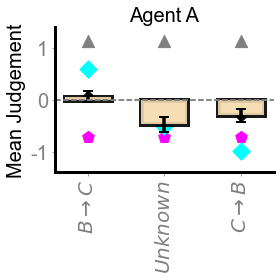

In [9]:
# GLOBAL PLOT PARAMETERS
plot_params = {'legend.fontsize': 'large',
               'axes.labelsize': 'large',
               'axes.titlesize':'20',
               'axes.labelsize':'20',
               'xtick.labelsize':'20',
               'font.family': 'Arial',
               'xtick.color':'grey',
               'ytick.color':'grey',
               'ytick.labelsize':'20',
               'axes.linewidth': '3'}


pylab.rcParams.update(plot_params)

def bar_plot(names, means, stds, cols, save_name, xticks):
    fig, axs = plt.subplots(1, 1, figsize=(4,4),sharey=True)   
    # axs.annotate(r'--', xy=(0, 0), xytext=(-0.05, 1.143), color='grey',fontsize=20,weight='bold')
    axs.bar(x=names,height=[np.mean(i) for i in means],yerr=stds,error_kw=dict(lw=3.5, capsize=5, capthick=2),path_effects=[pe.Stroke(linewidth=5, foreground='black'), pe.Normal()],
           color=cols, width=.6,alpha=.9)
    axs.scatter([0],[np.mean(means[0])], color='black',s=100,alpha=1,marker="8")
    axs.scatter([1],[np.mean(means[1])], color='black',s=100,alpha=1,marker="8")
    axs.scatter([2],[np.mean(means[2])], color='black',s=100,alpha=1,marker="8")
    pos_1 = [random.uniform(0.2,0.7) -0.45 for i in range(len(means[0]))]
    pos_2 = [random.uniform(1.2,1.7) -0.45 for i in range(len(means[1]))]
    pos_3 = [random.uniform(2.2,2.7) -0.45 for i in range(len(means[2]))]
    axs.scatter([0],[1.143], color='grey', marker="^",s=150)
    # axs.annotate(r'$Level_0$', xy=(0.12, 0.9))
    axs.scatter([0],[-.725], color='magenta', marker='p',s=150)
    # axs.annotate(r'$Level_1$', xy=(0.12, 0.6))
    axs.scatter([0],[0.59388461], color='cyan', marker='D',s=150)
    # axs.annotate(r'$Level_2$', xy=(0.12, 0.3))
    
    axs.scatter([1],[1.143], color='grey', marker="^",s=150)
    axs.scatter([1],[-0.725], color='magenta', marker='p',s=150)
    axs.scatter([1],[-0.509], color='cyan', marker='D',s=150)
    
    axs.scatter([2],[1.143], color='grey', marker="^",s=150)
    axs.scatter([2],[-0.725], color='magenta', marker='p',s=150)
    axs.scatter([2],[-0.990], color='cyan', marker='D',s=150)
    axs.axhline(y=0, color='grey', linestyle='--')
    axs.title.set_text(r'Agent A')
    axs.set_ylim([-1.4, 1.4])
    axs.set_xticks(xticks)
    axs.set_ylabel(r'Mean Judgement')
    axs.set_yticks([-1, 0, 1])
    axs.set_yticklabels([-1, 0, 1])
    axs.axhline(y=0, color='grey', linestyle='--')
    # axs.annotate(r'$red$', xy=(1, 1), xytext=(-0.35, .8))
    # axs.annotate(r'$blue$', xy=(1, 1), xytext=(-0.35, -.8))
    # axs.axhspan(0, 2.1, facecolor='red', alpha=0.2)
    # axs.axhspan(0, -2.1, facecolor='deepskyblue', alpha=0.2)   
    axs.spines['right'].set_visible(False)
    axs.spines['top'].set_visible(False)
    plt.xticks(rotation = 90)
    axs.set_xticklabels(names)
    fig.tight_layout()
    # axs.legend([r'$L_0$', r'$L_1$', r'$L_2$'],loc='upper left', bbox_to_anchor=(-0.03, 1.1),ncol=2,fontsize=22, frameon=False,borderpad=0.1, labelspacing=0.1, handlelength=.4, handletextpad=0.1, columnspacing=0.4)
    # plt.savefig(save_name) 
    plt.show()
    

# data = {'base': 0, 'sticky': 2, 'private': 0, 'naive': 5, 'private sticky': 1, 'naive sticky': 13}
names = [r'$B \rightarrow C$', r'$Unknown$', r'$C \rightarrow B$']
colors = ['wheat', 'wheat', 'wheat']
means = [cond_1_mean, cond_2_mean, cond_3_mean]
stds = [scipy.stats.sem(cond_1_mean), scipy.stats.sem(cond_2_mean), scipy.stats.sem(cond_3_mean)]
bar_plot(names, means, stds, colors, 'descriptive_plots/exp_1_means.pdf', [0, 1, 2])

In [11]:
# EXPERIMENT 2 
# EXPERIMENT 1 (SINGLE PP)
cond_1_indep = np.array(np.loadtxt('processed_data_and_figures/exp_2_three_players_known_structure/independent/independent_planet_judgments.txt').reshape(22,3,10))
cond_2_BC = np.array(np.loadtxt('processed_data_and_figures/exp_2_three_players_known_structure/b->c/b->c_planet_judgments.txt').reshape(22,3,10))

# computing mean mean judg within pp including all judg affected by manipulation (from 4 onwards)
cond_1_mean = []
cond_2_mean = []
for i in range(len(cond_1_indep)-1):
    cond_1_mean.append(np.mean(cond_1_indep[i, 0, 5:]))
for i in range(len(cond_2_BC)-1):
    cond_2_mean.append(np.mean(cond_2_BC[i, 0, 5:]))


print()

print('pairwise mannwhtneyu (not yet bonferroni adjusted')
print()
print(scipy.stats.mannwhitneyu(cond_1_mean, cond_2_mean, alternative='two-sided'))
print('Indep vs BC', 'res:')
print(mwu(cond_1_mean, cond_2_mean, 'two-sided'))
print()

print()
# used https://www.socscistatistics.com/tests/mannwhitney/default3.aspx to compute standardised U score reported in paper 
print('mean, sem, conf int')
print('cond 1', np.mean(cond_1_mean), scipy.stats.sem(cond_1_mean), np.mean(cond_1_mean) - 1.96 * scipy.stats.sem(cond_1_mean), np.mean(cond_1_mean) + 1.96 * scipy.stats.sem(cond_1_mean))
print('cond 2', np.mean(cond_2_mean), scipy.stats.sem(cond_2_mean), np.mean(cond_2_mean) - 1.96 * scipy.stats.sem(cond_2_mean), np.mean(cond_2_mean) + 1.96 * scipy.stats.sem(cond_2_mean))


pairwise mannwhtneyu (not yet bonferroni adjusted

MannwhitneyuResult(statistic=249.0, pvalue=0.47922480872064577)
Indep vs BC res:
     U-val alternative     p-val       RBC      CLES
MWU  249.0   two-sided  0.479225 -0.129252  0.564626


mean, sem, conf int
cond 1 0.20952380952380953 0.2076976696919464 -0.1975636230724054 0.6166112421200245
cond 2 -0.019047619047619063 0.2621903205161007 -0.5329406472591764 0.49484540916393827


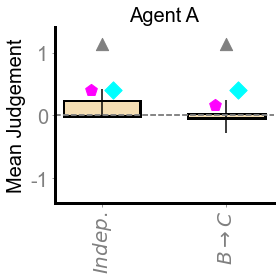

In [12]:
# GLOBAL PLOT PARAMETERS
plot_params = {'legend.fontsize': 'large',
               'axes.labelsize': 'large',
               'axes.titlesize':'20',
               'axes.labelsize':'20',
               'xtick.labelsize':'20',
               'font.family': 'Arial',
               'xtick.color':'grey',
               'ytick.color':'grey',
               'ytick.labelsize':'20',
               'axes.linewidth': '3'}


pylab.rcParams.update(plot_params)

def bar_plot(names, means, stds, cols, save_name, xticks):
    fig, axs = plt.subplots(1, 1, figsize=(4,4),sharey=True) 
    axs.bar(x=names,height=means,yerr=stds,path_effects=[pe.Stroke(linewidth=5, foreground='black'), pe.Normal()],
           color=cols, width=.6) 
    axs.scatter([0],[1.143], color='grey', marker="^",s=150)
    axs.scatter([-0.09],[0.404], color='magenta', marker='p',s=150)
    axs.scatter([0.09],[0.404], color='cyan', marker='D',s=150)
    
    axs.scatter([1],[1.143], color='grey', marker="^",s=150)
    axs.scatter([0.91],[0.171], color='magenta', marker='p',s=150)
    axs.scatter([1.09],[0.397], color='cyan', marker='D',s=150)
    axs.axhline(y=0, color='grey', linestyle='--')
    axs.title.set_text(r'Agent A')
    axs.set_ylim([-1.4, 1.4])
    axs.set_xticks(xticks)
    axs.set_ylabel(r'Mean Judgement')
    axs.set_yticks([-1, 0, 1])
    axs.set_yticklabels([-1, 0, 1])
    axs.axhline(y=0, color='grey', linestyle='--')
    # axs.annotate(r'$red$', xy=(1, 1), xytext=(-0.35, .8))
    # axs.annotate(r'$blue$', xy=(1, 1), xytext=(-0.35, -.8))
    # axs.axhspan(0, 2.1, facecolor='red', alpha=0.2)
    # axs.axhspan(0, -2.1, facecolor='deepskyblue', alpha=0.2)   
    axs.spines['right'].set_visible(False)
    axs.spines['top'].set_visible(False)
    plt.xticks(rotation = 90)
    axs.set_xticklabels(names)
    fig.tight_layout()
    # axs.legend([r'$L_0$', r'$L_1$', r'$L_2$'],loc='upper left', bbox_to_anchor=(-0.03, 1.1),ncol=2,fontsize=22, frameon=False,borderpad=0.1, labelspacing=0.1, handlelength=.4, handletextpad=0.1, columnspacing=0.4)
    # plt.savefig(save_name) 
    plt.show()
names = [r'$Indep.$', r'$B \rightarrow C$']
colors = ['wheat', 'wheat']
means = [np.mean(cond_1_mean), np.mean(cond_2_mean)]
stds = [scipy.stats.sem(cond_1_mean), scipy.stats.sem(cond_2_mean)]
bar_plot(names, means, stds, colors, 'descriptive_plots/exp_2_means_a.pdf', [0, 1])

In [13]:
# EXPERIMENT 3
# EXPERIMENT 1 (SINGLE PP)
cond_1_indep = np.array(np.loadtxt('processed_data_and_figures/exp_3_three_players_unknown_structure/independent/independent_planet_judgments.txt').reshape(23,3,10))
cond_2_BC = np.array(np.loadtxt('processed_data_and_figures/exp_3_three_players_unknown_structure/b->c/b->c_planet_judgments.txt').reshape(22,3,10))

# computing mean mean judg within pp including all judg affected by manipulation (from 4 onwards)
cond_1_mean = []
cond_2_mean = []
for i in range(len(cond_1_indep)-1):
    cond_1_mean.append(np.mean(cond_1_indep[i, 0, 5:]))
for i in range(len(cond_2_BC)-1):
    cond_2_mean.append(np.mean(cond_2_BC[i, 0, 5:]))


print()

print('pairwise mannwhtneyu (not yet bonferroni adjusted')
print()
print(scipy.stats.mannwhitneyu(cond_1_mean, cond_2_mean, alternative='two-sided'))
print('Indep vs BC', 'res:')
print(mwu(cond_1_mean, cond_2_mean, 'two-sided'))
print()

print()
# used https://www.socscistatistics.com/tests/mannwhitney/default3.aspx to compute standardised U score reported in paper 
print('mean, sem, conf int')
print('cond 1', np.mean(cond_1_mean), scipy.stats.sem(cond_1_mean), np.mean(cond_1_mean) - 1.96 * scipy.stats.sem(cond_1_mean), np.mean(cond_1_mean) + 1.96 * scipy.stats.sem(cond_1_mean))
print('cond 2', np.mean(cond_2_mean), scipy.stats.sem(cond_2_mean), np.mean(cond_2_mean) - 1.96 * scipy.stats.sem(cond_2_mean), np.mean(cond_2_mean) + 1.96 * scipy.stats.sem(cond_2_mean))


pairwise mannwhtneyu (not yet bonferroni adjusted

MannwhitneyuResult(statistic=251.5, pvalue=0.6258146766923011)
Indep vs BC res:
     U-val alternative     p-val       RBC      CLES
MWU  251.5   two-sided  0.625815 -0.088745  0.544372


mean, sem, conf int
cond 1 0.22727272727272732 0.259301577601061 -0.2809583648253522 0.7355038193708068
cond 2 0.15238095238095245 0.1851150282828089 -0.210444503053353 0.5152064078152578


[0.22727272727272732, 0.15238095238095245]
[0.259301577601061, 0.1851150282828089]


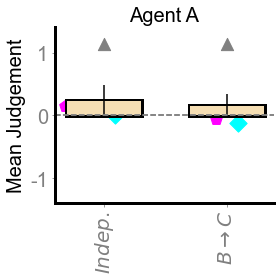

In [14]:
# GLOBAL PLOT PARAMETERS
plot_params = {'legend.fontsize': 'large',
               'axes.labelsize': 'large',
               'axes.titlesize':'20',
               'axes.labelsize':'20',
               'xtick.labelsize':'20',
               'font.family': 'Arial',
               'xtick.color':'grey',
               'ytick.color':'grey',
               'ytick.labelsize':'20',
               'axes.linewidth': '3'}


pylab.rcParams.update(plot_params)

def bar_plot(names, means, stds, cols, save_name, xticks):
    fig, axs = plt.subplots(1, 1, figsize=(4,4),sharey=True) 
    # axs.annotate(r'--', xy=(0, 0), xytext=(-0.05, 1.143), color='grey',fontsize=20,weight='bold')
    axs.bar(x=names,height=means,yerr=stds,path_effects=[pe.Stroke(linewidth=5, foreground='black'), pe.Normal()],
           color=cols, width=.6)
    axs.scatter([0],[1.143], color='grey', marker="^",s=150)
    axs.scatter([-0.32],[0.154], color='magenta', marker='p',s=150)
    axs.scatter([0.09],[0.009], color='cyan', marker='D',s=150)
    
    axs.scatter([1],[1.143], color='grey', marker="^",s=150)
    axs.scatter([0.91],[-0.060], color='magenta', marker='p',s=150)
    axs.scatter([1.09],[-0.12146], color='cyan', marker='D',s=150)
    axs.axhline(y=0, color='grey', linestyle='--')
    axs.title.set_text(r'Agent A')
    axs.set_ylim([-1.4, 1.4])
    axs.set_xticks(xticks)
    axs.set_ylabel(r'Mean Judgement')
    axs.set_yticks([-1, 0, 1])
    axs.set_yticklabels([-1, 0, 1])
    axs.axhline(y=0, color='grey', linestyle='--')
    # axs.annotate(r'$red$', xy=(1, 1), xytext=(-0.35, .8))
    # axs.annotate(r'$blue$', xy=(1, 1), xytext=(-0.35, -.8))
    # axs.axhspan(0, 2.1, facecolor='red', alpha=0.2)
    # axs.axhspan(0, -2.1, facecolor='deepskyblue', alpha=0.2)   
    axs.spines['right'].set_visible(False)
    axs.spines['top'].set_visible(False)
    plt.xticks(rotation = 90)
    axs.set_xticklabels(names)
    fig.tight_layout()
    # axs.legend([r'$L_0$', r'$L_1$', r'$L_2$'],loc='upper left', bbox_to_anchor=(-0.03, 1.1),ncol=2,fontsize=22, frameon=False,borderpad=0.1, labelspacing=0.1, handlelength=.4, handletextpad=0.1, columnspacing=0.4)
    # plt.savefig(save_name) 
    plt.show()
# data = {'base': 0, 'sticky': 2, 'private': 0, 'naive': 5, 'private sticky': 1, 'naive sticky': 13}
names = [r'$Indep.$', r'$B \rightarrow C$']
colors = ['wheat', 'wheat']
means = [np.mean(cond_1_mean), np.mean(cond_2_mean)]
stds = [scipy.stats.sem(cond_1_mean), scipy.stats.sem(cond_2_mean)]
print(means)
print(stds)
bar_plot(names, means, stds, colors, 'descriptive_plots/exp_3_means_a.pdf', [0, 1])